In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import arviz as az
np.random.seed(42)

## Visualization 

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods and often without the explicit use of a statistical models. Exploratory analysis of Bayesian models take many of the ideas commonly associated with EDA and apply them to the analysis of Bayesian models and their results. As visualization plays such an important place in this approach we start discussing a few key concepts related to this.

def Data visualization

Data visualization is a very broad area with graphical representations targeting very particular audiences like a scientific paper in some not-over-hyper subject to newspapers with million readers. We will focus on scientific visualizations and in particular visualizations useful in a Bayesian setting.

Data visualization is a powerful tool because our eyes and brains are generally very good at interpreting visual information, most of us can distinguish millions of colors, and other properties like the depth of objects, it's texture etc. At the same time our visual system can be fooled, as you may have experience with visual illusions, the reason is that our visual system is tuned to process information in useful way and this generally means interpreting the information _guess stuff_ and not just _reproduce the outside world_. Effective data visualization requires that we recognize the abilities and limitations of our own visual system.

As humans are generally good at visualizing data, data visualization is both a powerful tool for analyzing data and models and is also a powerful tool to convey information to our target audience. Using words, tables and just number are generally less effective way to communicate information.

## General stuff about matplotlib???

![](https://matplotlib.org/_images/anatomy.png)

## Colors

Something about color and color-blindness.

ArviZ is packed with a few additional styles that can be applied globally by writing `az.style.use(nameofstyle)` or locally using a `with` statement like in the following example:

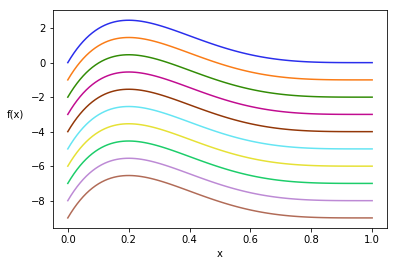

In [2]:
x = np.linspace(0, 1, 100)
dist = stats.beta(2, 5).pdf(x)

fig = plt.figure()
with az.style.context('arviz-colors'):
    for i in range(10):
        plt.plot(x, dist - i, f'C{i}', label=f'C{i}')
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0, labelpad=15);

All styles included with ArviZ use the same color-blind friendly pallete. This pallete was designed using https://colorcyclepicker.mpetroff.net/. This pallete is not designed to work well in grey-scale. If you have to do something using grey-scale we recomend to restrict yourself to the first 3 colors of this pallete ('C0', 'C1' and 'C2'), otherwise you should use different [lines styles](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) or [different markers](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)

In [3]:
from matplotlib import lines
lines.lineStyles

{'': '_draw_nothing',
 ' ': '_draw_nothing',
 '-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing'}

In [4]:
from matplotlib import markers
markers.MarkerStyle.markers

{'': 'nothing',
 ' ': 'nothing',
 '*': 'star',
 '+': 'plus',
 ',': 'pixel',
 '.': 'point',
 0: 'tickleft',
 '1': 'tri_down',
 1: 'tickright',
 10: 'caretupbase',
 11: 'caretdownbase',
 '2': 'tri_up',
 2: 'tickup',
 '3': 'tri_left',
 3: 'tickdown',
 '4': 'tri_right',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 '8': 'octagon',
 8: 'caretleftbase',
 9: 'caretrightbase',
 '<': 'triangle_left',
 '>': 'triangle_right',
 'D': 'diamond',
 'H': 'hexagon2',
 'None': 'nothing',
 None: 'nothing',
 'P': 'plus_filled',
 'X': 'x_filled',
 '^': 'triangle_up',
 '_': 'hline',
 'd': 'thin_diamond',
 'h': 'hexagon1',
 'o': 'circle',
 'p': 'pentagon',
 's': 'square',
 'v': 'triangle_down',
 'x': 'x',
 '|': 'vline'}

## Continuous and discrete distributions



A discrete distribution is lala by default ArviZ use a histogram to represent discrete distributions. A histogram is lala. ArviZ always tries to associate the binned data with discrete values. For example in the following plot each _bar_ is associated with a integer in the interval [0, 9]

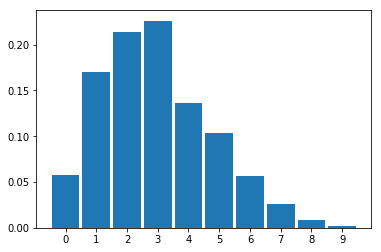

In [5]:
d_values = stats.poisson(3).rvs(500)
az.plot_dist(d_values);

A continuous distribution is lala by default ArviZ use a KDE to represent continuous distributions

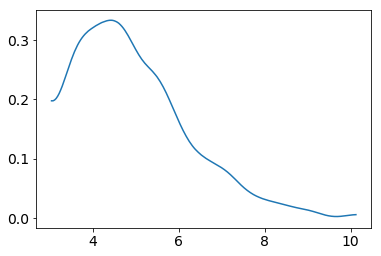

In [6]:
c_values = stats.gamma(2, 3).rvs(500)
az.plot_dist(c_values);

Explain the basic idea behind a KDE

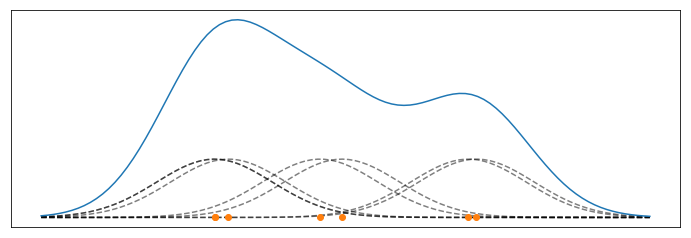

In [7]:
_, ax = plt.subplots(figsize=(12, 4))
bw = 0.4
np.random.seed(42)
y = np.random.normal(7, size=7)
x = np.linspace(y.min() - bw * 3, y.max() + bw * 3, 100)
kernels = np.transpose([stats.norm.pdf(x, i, bw) for i in y])
ax.plot(x, kernels, 'k--', alpha=0.5)
ax.plot(y, np.zeros(len(y)), 'C1o')
ax.plot(x, kernels.sum(1))

ax.set_xticks([])
ax.set_yticks([]);

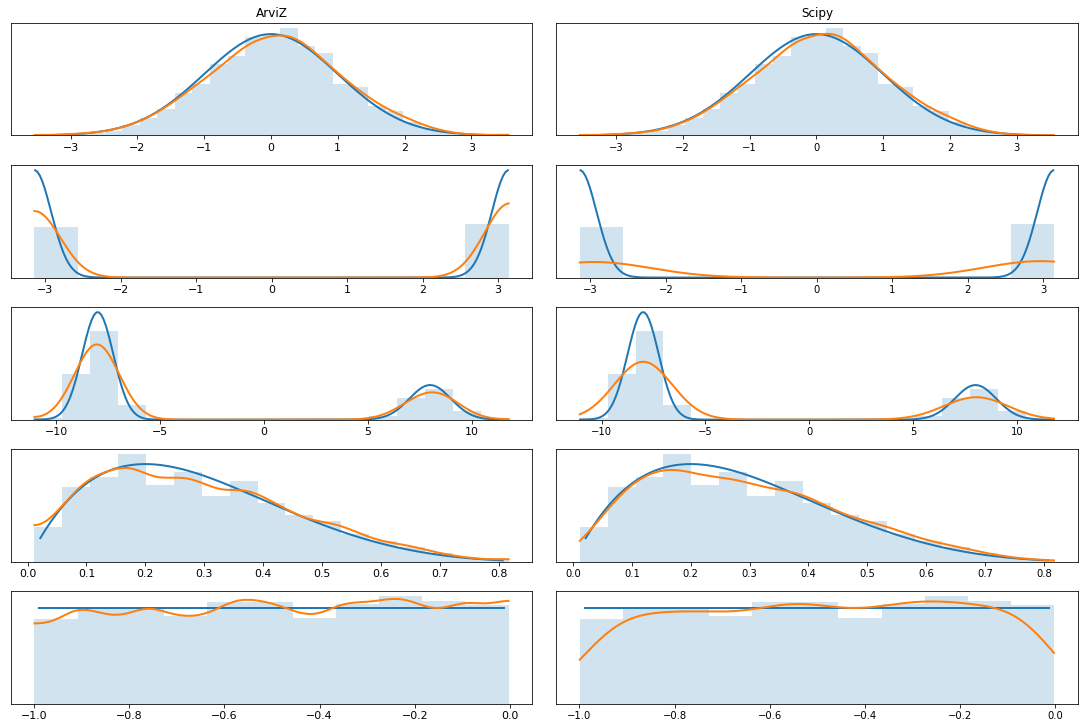

In [8]:
def scipykdeplot(data, ax, **kwargs):
    x = np.linspace(data.min(), data.max(), len(data))
    kde = stats.gaussian_kde(data)
    density = kde.evaluate(x)
    ax.plot(x, density, **kwargs)

size = 1000
bw = 4.5 # ArviZ's default value
_, ax = plt.subplots(5, 2, figsize=(15, 10), constrained_layout=True)

a_dist = stats.vonmises(loc=np.pi, kappa=20)
b_dist = stats.beta(a=2, b=5)
c_dist = [stats.norm(-8, 0.75), stats.norm(8, 1)]
d_dist = stats.norm(0, 1)
e_dist = stats.uniform(-1, 1)
a = a_dist.rvs(size)
a = np.arctan2(np.sin(a), np.cos(a))
b = b_dist.rvs(size)
c = np.concatenate((c_dist[0].rvs(7000), c_dist[1].rvs(3000)))
d = d_dist.rvs(size)
e = e_dist.rvs(size)


ax[0, 0].set_title('ArviZ')
ax[0, 1].set_title('Scipy')

for idx, (i, dist) in enumerate(zip([d, a, c, b, e], [d_dist, a_dist, c_dist, b_dist,  e_dist] )):
    x = np.linspace(i.min()+0.01, i.max()-0.01, 200)
    if idx == 2:
        x_dist = np.concatenate((dist[0].pdf(x[:100]) * 0.7, dist[1].pdf(x[100:]) * 0.3))
    else:
        x_dist = dist.pdf(x)

    ax[idx, 0].plot(x, x_dist, 'C0', lw=2) 
    az.plot_kde(i, ax=ax[idx, 0], bw=bw, textsize=11, plot_kwargs={'color':'C1', 'linewidth':2})
    ax[idx, 0].set_yticks([])
    ax[idx, 0].hist(i, bins='auto', alpha=0.2, density=True)

    ax[idx, 1].plot(x, x_dist, 'C0', lw=2) 
    scipykdeplot(i, ax=ax[idx, 1], color='C1', lw=2)
    ax[idx, 1].set_yticks([])
    ax[idx, 1].hist(i, bins='auto', alpha=0.2, density=True)